# 1. Read DAT File
Typical workflow: go to https://midcdmz.nrel.gov/apps/day.pl?BMS 

Get the following fields for ALL TIMES (not just sunrise):

- Global CMP22 (vent/cor) [W/m^2]
- Direct CHP1-1 [W/m^2]
- Diffuse 8-48 (vent) [W/m^2]
- Tower Dry Bulb Temp [deg C]
- Avg Wind Speed @ 6ft [m/s]
- Albedo (CMP11)

Average to 1, 15 or 60 minutes and removes values out of bound (if any)

Save on PSM3 format for use with bifacialVF, SAM, and PVSyst

In [1]:
datafolder = 'Data'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pvlib
import datetime
import pprint
import os

In [5]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
pd.plotting.register_matplotlib_converters()

In [6]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)


Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0


# Functions to Update SSRL Data and Save

In [116]:
# I'm sure there is a more elegant way /faster
#Get logger data
df = pd.read_csv(os.path.join(datafolder, 'BARNirrad.dat'))
loggerdata = df.columns
loggerdata
# Get metadata
df = pd.read_csv(os.path.join(datafolder, 'BARNirrad.dat'), skiprows=1)
metadata = df.loc[0] 
df = df[2::] # Removing the garbage intor lines
# Dealing with index and timestamping properly
df = df.reset_index()
df.index.name = 'ind'
df = df.drop('index', axis=1)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)
df = df.tz_localize('Etc/GMT+7')
# Everything got read as object, so now replacing by numeric
df = df.replace('NAN', np.nan)
df[df.keys()[1::]] = df[df.keys()[1::]].astype(float)
df['RECORD'] = df['RECORD'].astype(int)

In [134]:
df2 = df.resample('60T', closed='right', label='right').mean() #

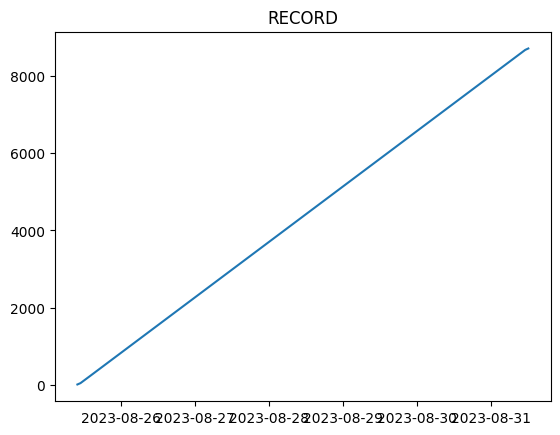

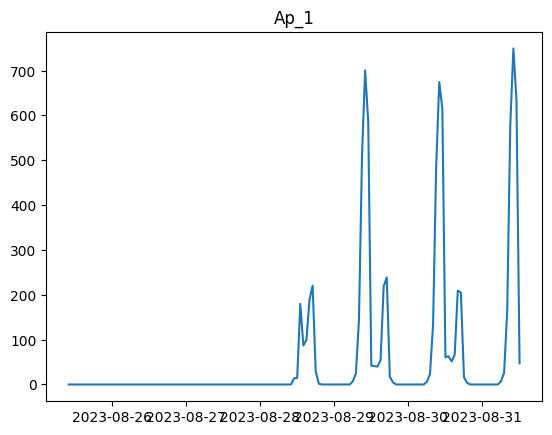

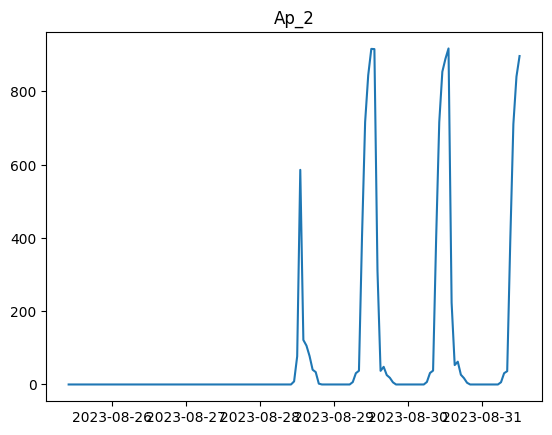

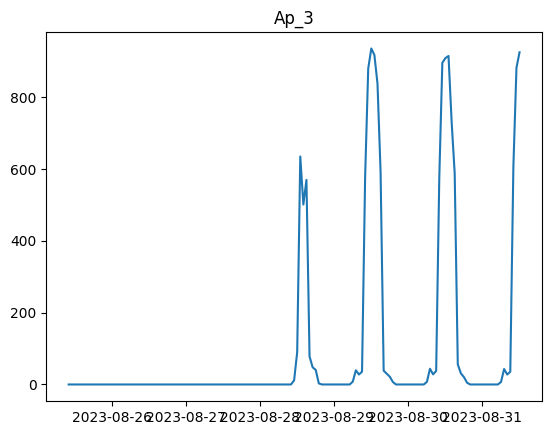

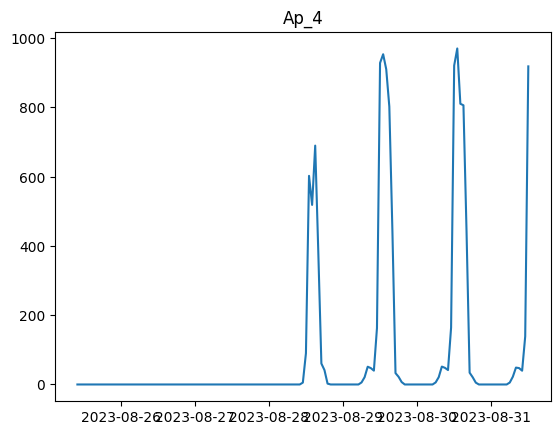

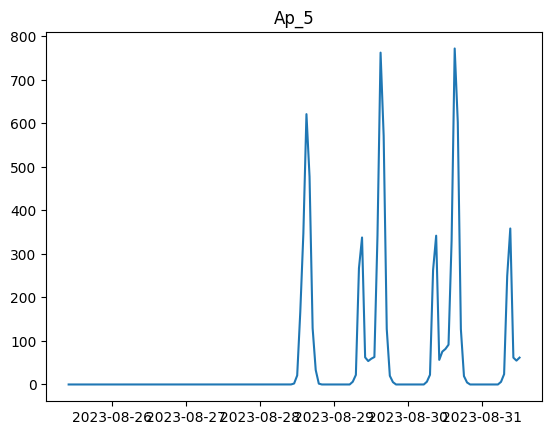

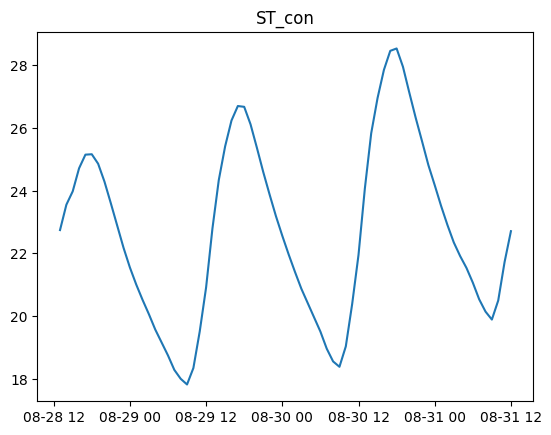

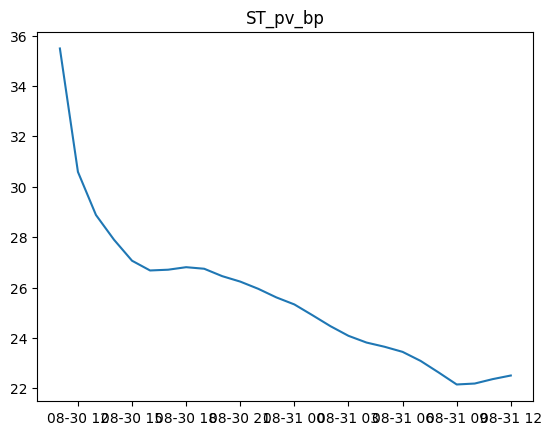

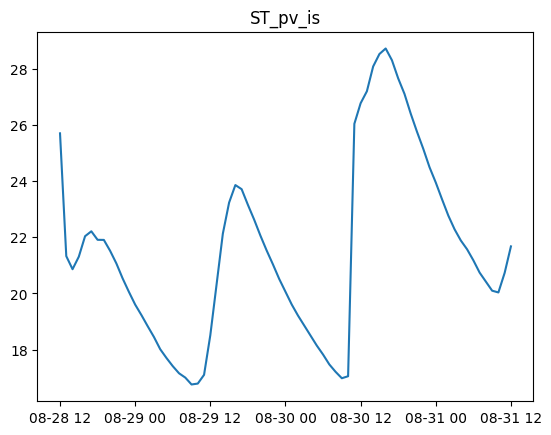

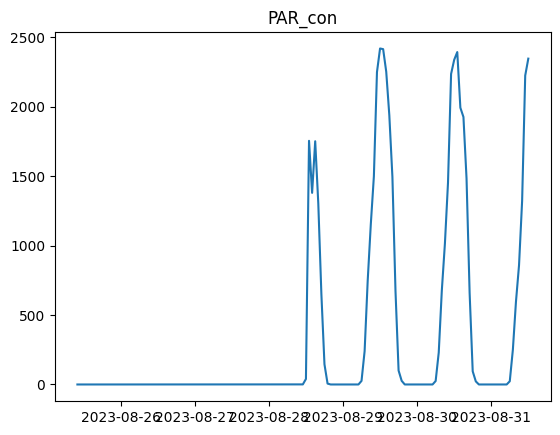

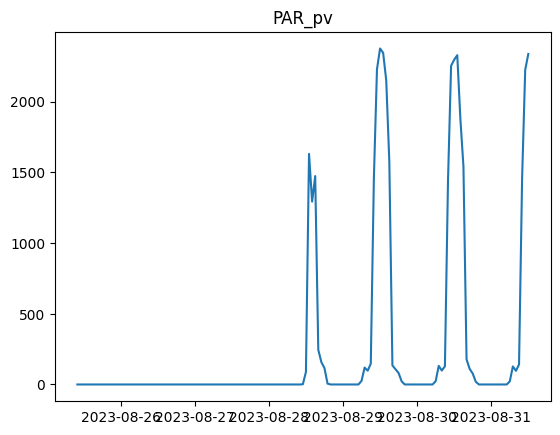

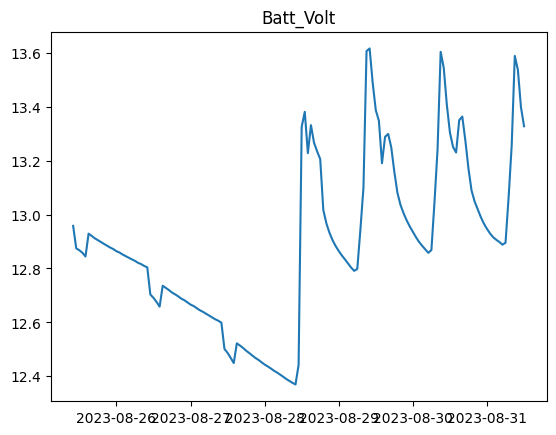

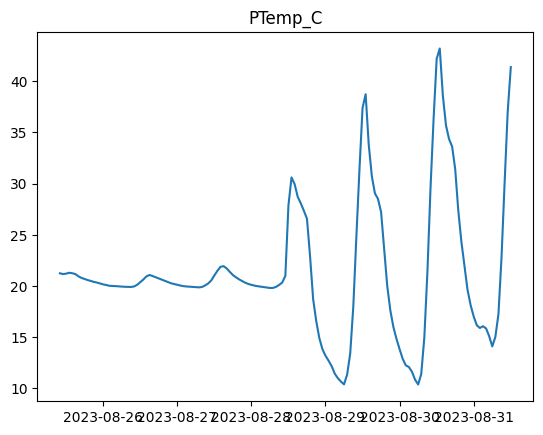

In [136]:
for col in df2:
    plt.figure()
    plt.plot(df2[col])
    plt.title(col)